Analysis of the edge distribution over distances in the graph of the input data.

In [1]:
from vertex import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
verticesInGraph = verticesFromGraph()

data = dataLoader()

data.dropna(inplace=True)

# consider only the vertices that are in the graph
data = data[data[0].isin(verticesInGraph['subreddit'])]

embeddings = data.iloc[:, 1:].values

In [3]:
subreddit = 'askreddit' 

data = edgesFromGraph()

data.dropna(inplace=True)

data = data[data['SOURCE_SUBREDDIT'].isin(verticesInGraph['subreddit'])]

data = data[data['SOURCE_SUBREDDIT'] == subreddit]

edges = data['TARGET_SUBREDDIT'].values

# change it into unique but weighted edges

edges = np.unique(edges, return_counts=True)

edges = pd.DataFrame(data={'subreddit': edges[0], 'count': edges[1]})

subreddit_embedding = verticesInGraph[verticesInGraph['subreddit'] == subreddit].iloc[0, 1:].values

edges.shape

(363, 2)

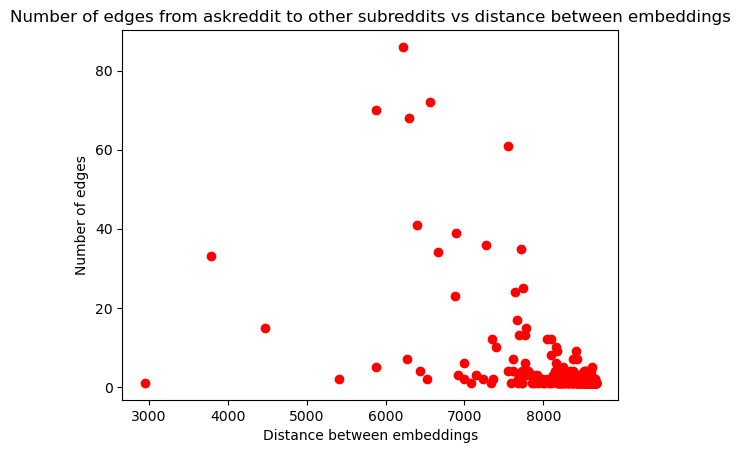

In [4]:
# plot graph of edges to distance between embeddings

fig, ax = plt.subplots()

for i in range(edges.shape[0]):
    target = edges.iloc[i, 0]
    target_embedding = verticesInGraph[verticesInGraph['subreddit'] == target].iloc[0, 1:].values
    distance = np.linalg.norm(subreddit_embedding - target_embedding)
    ax.plot(distance, edges.iloc[i, 1], 'ro')
    # ax.annotate(target, (distance, edges.iloc[i, 1]))
    
ax.set_xlabel('Distance between embeddings')
ax.set_ylabel('Number of edges')
ax.set_title('Number of edges from {subreddit} to other subreddits vs distance between embeddings'.format(subreddit=subreddit))

# make distance in log scale
plt.show()



In [5]:
# Compare results with 2d embeddings of the graph

# get 2d embeddings of the graph.
data = pd.read_csv('PCA_2d.csv').iloc[:, 1:]


edges.shape

(363, 2)

0           subreddit  count
0             4chan      3
1     adventuretime      1
2            advice      2
3     adviceanimals     61
4       albuquerque      1
..              ...    ...
358   worldpolitics      1
359  wouldyourather      2
360  writingprompts     15
361             wtf     25
362   youshouldknow      3

[363 rows x 2 columns]
1           subreddit  count
0             4chan      3
1     adventuretime      1
2            advice      2
3     adviceanimals     61
4       albuquerque      1
..              ...    ...
358   worldpolitics      1
359  wouldyourather      2
360  writingprompts     15
361             wtf     25
362   youshouldknow      3

[363 rows x 2 columns]


IndexError: single positional indexer is out-of-bounds

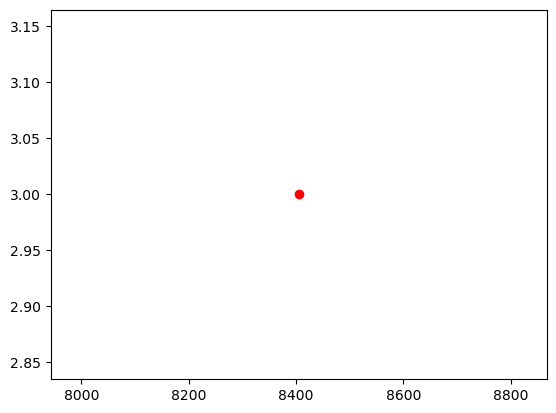

In [9]:

subreddit_embedding = data[data['subreddit'] == subreddit].iloc[0, 1:].values

fig, ax = plt.subplots()

for i in range(edges.shape[0]):
    target = edges.iloc[i, 0]
    target_embedding = data[data['subreddit'] == target].iloc[0, 1:].values
    distance = np.linalg.norm(subreddit_embedding - target_embedding)
    ax.plot(distance, edges.iloc[i, 1], 'ro')
    # ax.annotate(target, (distance, edges.iloc[i, 1]))
    
ax.set_xlabel('Distance between embeddings')
ax.set_ylabel('Number of edges')
ax.set_title('Number of edges from {subreddit} to other subreddits vs distance between embeddings'.format(subreddit=subreddit))

# make distance in log scale
plt.show()


